In [3]:
# !pip install -U gdown
!pip install pytorch_lightning
!pip install scikit-network
!pip install git+https://github.com/SberProcessMining/Sber_Process_Mining.git
!pip install -U matplotlib
!pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/SberProcessMining/Sber_Process_Mining.git to /tmp/pip-req-build-b57j3r6i
  Running command git clone -q https://github.com/SberProcessMining/Sber_Process_Mining.git /tmp/pip-req-build-b57j3r6i
  Using cached matplotlib-3.4.3-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you ha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sberpm 1.3.1 requires matplotlib~=3.4.2, but you have matplotlib 3.5.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
import os
import networkx as nx
import seaborn as sns
import sknetwork
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
#import sberpm

import sys
sys.path.append('/content/drive/MyDrive/Drill planner/Code')
#from Drill_planner import DrillPlaner #, nx_graph, GraphMiner, DrillGraphMiner
import sknetwork

In [8]:
data = pd.read_excel('/content/drive/MyDrive/Drill planner/Data/Dataset2.xlsx')

# Data preprocessing

In [9]:
data.columns

Index(['Unnamed: 0', 'Well number', 'Section', 'Phase', 'Trip number', 'Data',
       'Depth, m', 'Time, h', 'Time, days', 'Time, h (in grains)',
       'Type of work', 'Operation code', 'Operation description', 'Timestamp',
       'Event number'],
      dtype='object')

In [10]:
data['Operation code'] = data['Operation code'].astype(int)

In [11]:
data

,Unnamed: 0,Well number,Section,Phase,Trip number,Data,"Depth, m","Time, h","Time, days","Time, h (in grains)",Type of work,Operation code,Operation description,Timestamp,Event number
0,0,2083,Направление,БУРНАП,1.0,2021-08-06,0.0,02:00:00,0.083333,2.000000,Сборка роторной КНБК,301,Сборка КНБК,2022-01-01 00:00:00,1.0
1,1,2083,Направление,БУРНАП,1.0,2021-08-06,41.9,07:50:00,0.326389,7.833333,Бурение с вращением без ВЗД,204,"Бурение в инт. 10.3-41.9м (G=2-5т, Qвх=20-50л/...",2022-01-01 07:50:00,1.0
2,2,2083,Направление,БУРНАП,1.0,2021-08-06,41.9,02:00:00,0.083333,2.000000,Проработка перед наращиванием,419,Проработка,2022-01-01 09:50:00,1.0
3,3,2083,Направление,БУРНАП,1.0,2021-08-06,41.9,01:20:00,0.055556,1.333333,Наращивание во время бурения трубкой (с мостков),304,Наращивание (3раза),2022-01-01 11:10:00,1.0
4,4,2083,Направление,БУРНАП,1.0,2021-08-06,41.9,00:25:00,0.017361,0.416667,Шаблонировка вверх,323,Подъем инструмента (шаблонирование) в инт. 31....,2022-01-01 11:35:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,6657,3094,Хвостовик,КРЕПХВОСТ,NaN,2022-05-03,4780.0,00:20:00,0.013889,0.333333,Промывка без расхаживания с вращением БИ,402,ПР к вымыву ДТ.,2022-03-26 01:20:00,NaN
5734,6658,3094,Хвостовик,КРЕПХВОСТ,NaN,2022-05-03,4780.0,01:15:00,0.052083,1.583333,Перевод на жидкость заканчивания,411,Обратная промывка через ЦА 320. Вымыв ДТ. (Qвх...,2022-03-26 02:35:00,NaN
5735,6661,3094,Хвостовик,КРЕПХВОСТ,NaN,2022-05-04,4780.0,01:05:00,0.045139,1.083333,Промывка без расхаживания и вращения БИ,403,"Промывка, перевод скважины на KCl плотностью 1...",2022-03-26 04:30:00,NaN
5736,6662,3094,Хвостовик,КРЕПХВОСТ,NaN,2022-05-04,4780.0,10:30:00,0.437500,10.500000,Подъем БИ с выбросом на мостки в обсаженном ст...,326,Подъем транспортировочной колонны в инт. 3548....,2022-03-26 15:00:00,NaN


In [25]:
class Full_preprocessing:
  @staticmethod
  def codes_changer(data, replacement_target, lists_to_replace, replacements):
    for l,r in zip(lists_to_replace, replacements):
      data[replacement_target].replace(l, r, inplace = True)
  @staticmethod
  def operation_lag(data, code_column, lag,next_operation=False):
    df = np.zeros_like(data[code_column].values)
    df[lag:] = data[code_column].values[:-lag]
    if next_operation:
      df[:-lag] = data[code_column].values[lag:]
    return df

In [13]:
Full_preprocessing.codes_changer(data, 'Operation code', [[306, 307,308,309]], [310])
Full_preprocessing.codes_changer(data, 'Operation code', [[301,302,303,304]], [305])
Full_preprocessing.codes_changer(data, 'Operation code', [[315,316,330,331]], [348])
Full_preprocessing.codes_changer(data, 'Operation code', [[317,318,332,333]], [347])


In [14]:
data['One_lag'] = Full_preprocessing.operation_lag(data,['Operation code'],1)
data['Two_lag'] = Full_preprocessing.operation_lag(data,['Operation code'],2)
data['Three_lag'] = Full_preprocessing.operation_lag(data,['Operation code'],3)
data['Four_lag'] = Full_preprocessing.operation_lag(data,['Operation code'],4)
data['Five_lag'] = Full_preprocessing.operation_lag(data,['Operation code'],5)

In [15]:
# укрупнение кодов
data['Operation code'] = *map(lambda i: int(str(i)[:1]),data['Operation code'].tolist()),
data['Next_operation'] = Full_preprocessing.operation_lag(data,['Operation code'],1,next_operation=True)


In [17]:
# data['cumsum_sales'] = data.groupby(['Operation code'])['Depth, m'].cumsum()
data['cumcount'] = data.groupby(['Operation code','Well number'])['Operation code'].cumcount()

In [24]:
pd.set_option('display.max_columns',25)
data[data['Well number']== 3071].head(20)

,Unnamed: 0,Well number,Section,Phase,Trip number,Data,"Depth, m","Time, h","Time, days","Time, h (in grains)",Type of work,Operation code,Operation description,Timestamp,Event number,One_lag,Two_lag,Three_lag,Four_lag,Five_lag,Next_operation,cumcount
3964,4570,3071,Направление,БУРНАП,NaN,2022-01-06,10.0,02:35:00,0.107639,2.583333,Сборка роторной КНБК,3,Сборка КНБК в инт. 0-10м,2022-01-01 00:00:00,NaN,706,702,701,406,606,4,0
3965,4571,3071,Направление,БУРНАП,NaN,2022-01-06,10.0,00:05:00,0.003472,0.083333,Промывка без расхаживания с вращением БИ,4,"Промывкавыход на режим Qвх=2-20л/с, Pвх=1.5-2к...",2022-01-01 00:05:00,NaN,305,706,702,701,406,2,0
3966,4572,3071,Направление,БУРНАП,NaN,2022-01-06,12.0,00:25:00,0.017361,0.416667,Бурение с вращением без ВЗД,2,"Бурение в инт. 10.2-11.9м (G=1-2т, Qвх=20л/с, ...",2022-01-01 00:30:00,NaN,402,305,706,702,701,4,0
3967,4573,3071,Направление,БУРНАП,NaN,2022-01-06,12.0,00:40:00,0.027778,0.666667,Промывка без расхаживания с вращением БИ,4,"Промывка в инт. 9.3-11.9м (Qвх=8-20л/с, Pвх=1-...",2022-01-01 01:10:00,NaN,204,402,305,706,702,2,1
3968,4574,3071,Направление,БУРНАП,NaN,2022-01-06,20.0,04:15:00,0.177083,7.083333,Бурение с вращением без ВЗД,2,"Бурение в инт. 11.9-20.4м (G=5-7т, Qвх=18-20л/...",2022-01-01 05:25:00,NaN,402,204,402,305,706,4,1
3969,4577,3071,Направление,БУРНАП,NaN,2022-01-07,36.0,00:45:00,0.031250,0.750000,Проработка перед наращиванием,4,"Проработка в инт. 11.9-36.4м Qвх=10л/с, Pвх=1-...",2022-01-01 14:15:00,NaN,204,402,204,402,305,3,2
3970,4578,3071,Направление,БУРНАП,NaN,2022-01-07,36.0,00:35:00,0.024306,0.583333,Наращивание во время бурения свечой,3,Наращивание.,2022-01-01 14:50:00,NaN,419,204,402,204,402,4,1
3971,4579,3071,Направление,БУРНАП,NaN,2022-01-07,36.0,00:25:00,0.017361,0.416667,Промывка с расхаживанием и вращением БИ (не бо...,4,"Промывка в инт. 33-36.4м Qвх=8-10л/с, Pвх=1-2к...",2022-01-01 15:15:00,NaN,343,419,204,402,204,4,3
3972,4580,3071,Направление,БУРНАП,NaN,2022-01-07,40.0,00:40:00,0.027778,0.666667,Прямая проработка,4,"Проработка в инт. 24.7-40м Qвх=15л/с, Pвх=1-2к...",2022-01-01 15:55:00,NaN,401,343,419,204,402,4,4
3973,4581,3071,Направление,БУРНАП,NaN,2022-01-07,40.0,02:10:00,0.090278,2.166667,Промывка с расхаживанием и вращением БИ (не бо...,4,"Промывка на глуб. 15.3-39.9м Qвх=15л/с, Pвх=1-...",2022-01-01 18:05:00,NaN,425,401,343,419,204,3,5


(array([ 133.,  675., 1914., 2104.,    0.,  307.,  258.,  194.,  112.,
          41.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

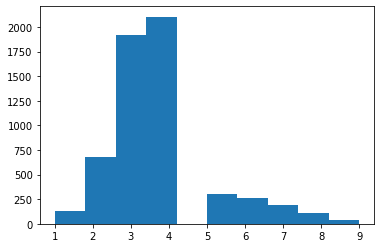

In [26]:
plt.hist(data['Operation code'])

In [27]:
#data_ohe = pd.get_dummies(data,columns=['One_lag','Two_lag','Three_lag','Four_lag','Five_lag'])

In [28]:
train = data[['Section','Phase','Depth, m','Time, h (in grains)','One_lag','Two_lag','Three_lag','Four_lag','Five_lag','cumcount']]
label = data['Next_operation']

In [29]:
train

,Section,Phase,"Depth, m","Time, h (in grains)",One_lag,Two_lag,Three_lag,Four_lag,Five_lag,cumcount
0,Направление,БУРНАП,0.0,2.000000,0,0,0,0,0,0
1,Направление,БУРНАП,41.9,7.833333,305,0,0,0,0,0
2,Направление,БУРНАП,41.9,2.000000,204,305,0,0,0,0
3,Направление,БУРНАП,41.9,1.333333,419,204,305,0,0,1
4,Направление,БУРНАП,41.9,0.416667,305,419,204,305,0,2
...,...,...,...,...,...,...,...,...,...,...
5733,Хвостовик,КРЕПХВОСТ,4780.0,0.333333,908,912,907,1001,411,167
5734,Хвостовик,КРЕПХВОСТ,4780.0,1.583333,402,908,912,907,1001,168
5735,Хвостовик,КРЕПХВОСТ,4780.0,1.083333,411,402,908,912,907,169
5736,Хвостовик,КРЕПХВОСТ,4780.0,10.500000,403,411,402,908,912,170


In [30]:
enc = OneHotEncoder()
label_enc = enc.fit_transform(label.values.reshape(-1,1))
#label.toarray()

In [31]:
le = LabelEncoder()
train['Section'] = le.fit_transform(train['Section'])
train['Phase'] = le.fit_transform(train['Phase'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Classical ML model

In [32]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [33]:
xgb = xgboost.XGBClassifier()
xgb_param_grid = {  'min_child_weight': [1],
   #     'gamma': [0.5, 1, 1.5, 2, 5],
   #     'subsample': [0.6, 0.8, 1.0],
    #    'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'objective': ['multi:softmax','multi:softprob'],
        'n_estimators':[100,200]}
RF_param_grid = {'max_depth':[4,6,10,12],
                 'n_estimators':[100,200,160]}

lr_param_grid = {'penalty':['l2','l1'],
                 'C':[1,2,0.5]}

onevs_lr = {
    "estimator__C": [1,2,4,8],
    'estimator__penalty':['l2','l1'] }


onevs_rf = {
    "estimator__max_depth": [4,8,10,12],
    'estimator__n_estimators':[100,200,160]}


onevsone_rf = {
    "estimator__max_depth": [4,8,10,12],
    'estimator__n_estimators':[100,200,160]}

onevs_xgb_param_grid = {  'estimator__min_child_weight': [1, 5],
       # 'estimator__gamma': [0.5, 1, 1.5, 2, 5],
      #  'estimator__subsample': [0.6, 0.8, 1.0],
      #  'estimator__colsample_bytree': [0.6, 0.8, 1.0],
        'estimator__max_depth': [3, 4, 5],
        'estimator__objective': ['binary:logistic'],
        'estimator__n_estimators':[100,200,60]}



In [53]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
models = [xgboost.XGBClassifier(),RandomForestClassifier(),LogisticRegression(),
          OneVsOneClassifier(xgboost.XGBClassifier()),OneVsOneClassifier(RandomForestClassifier()), OneVsOneClassifier(LogisticRegression()),
          OneVsRestClassifier(xgboost.XGBClassifier()),OneVsRestClassifier(RandomForestClassifier()), OneVsRestClassifier(LogisticRegression()),
]
model_names = ['XGboost classifier','Random forest','Logistic Regression',
               'OneVsOne XGBClassifier', 'OneVsOne Random Forest', 'OneVsOne LR',
               'OneVsRest XGBClassifier', 'OneVsRest Random Forest', 'OneVsRest LR',
               ]
param_grid = [xgb_param_grid, RF_param_grid,lr_param_grid,
              onevs_xgb_param_grid,onevs_rf,onevs_lr,
              onevs_xgb_param_grid,onevs_rf,onevs_lr]

def classical_ml_training(models:list,model_names:list,X,y,param_grid:list):
  final_models = []
  score = []


  for i,model in tqdm(enumerate(models)):
    if model_names[i] =='Logistic Regression' or  model_names[i] =='OneVsOne LR' or model_names[i] =='OneVsRest LR':
      sc = StandardScaler()
      X = sc.fit_transform(X)
      enc = OneHotEncoder()
      label_enc = enc.fit_transform(label.values.reshape(-1,1)) 
      label_enc = label_enc.toarray()
   # estimator = model()
  #  scoring = {"AUC": "roc_auc", "Accuracy": accuracy_score,'Precision': precision_score,'Recall':recall_score}
    scoring = ['accuracy','f1','precision','recall']
    grid_search = GridSearchCV(
      estimator=model,
      param_grid=param_grid[i],
      scoring = 'accuracy',
      n_jobs = 10,
      cv = 3,
      verbose=10,
      refit = 'f1',
      return_train_score=True
  )
    grid_search.fit(X, y)
    print(f'For {model_names[i]} best f1 score is {grid_search.best_score_}')
    #scpre = cross_val_score(mod,X,y,scoring='f1_weighted',cv=5).mean()
    score.append(grid_search.best_score_)
    final_models.append(grid_search.best_estimator_)
  return score,final_models



In [ ]:
score, final_models = classical_ml_training(models,model_names,train,label,param_grid)

0it [00:00, ?it/s]

Fitting 3 folds for each of 12 candidates, totalling 36 fits


1it [01:52, 112.87s/it]

For XGboost classifier best f1 score is 0.5503668651908945
Fitting 3 folds for each of 12 candidates, totalling 36 fits


2it [02:20, 62.93s/it] 

For Random forest best f1 score is 0.5517619298625495
Fitting 3 folds for each of 6 candidates, totalling 18 fits


3it [02:23, 35.59s/it]

For Logistic Regression best f1 score is 0.40902862379622357
Fitting 3 folds for each of 18 candidates, totalling 54 fits


4it [05:26, 93.73s/it]

For OneVsOne XGBClassifier best f1 score is 0.5552486802112245
Fitting 3 folds for each of 12 candidates, totalling 36 fits


5it [14:51, 263.73s/it]

For OneVsOne Random Forest best f1 score is 0.5568150750097877
Fitting 3 folds for each of 8 candidates, totalling 24 fits


6it [14:55, 175.30s/it]

For OneVsOne LR best f1 score is 0.4139083427564903
Fitting 3 folds for each of 18 candidates, totalling 54 fits


7it [17:07, 160.98s/it]

For OneVsRest XGBClassifier best f1 score is 0.5599524212592254
Fitting 3 folds for each of 12 candidates, totalling 36 fits


8it [20:25, 172.93s/it]

For OneVsRest Random Forest best f1 score is 0.5583826545379519
Fitting 3 folds for each of 8 candidates, totalling 24 fits


9it [20:27, 136.36s/it]

For OneVsRest LR best f1 score is 0.4072853397549323
